In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [2]:

raw_dataset = pd.read_csv('Dallas data summary backfiled(1Y).csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()


features.tail(75)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
91,10/1/2012,132.46442,3.38,47092,6753.889,6.1,392917.447,674.9633,40.10%,127334,3.50%,3004,4.17,224.318
92,11/1/2012,132.58258,3.35,47092,6753.889,5.9,392917.447,674.9633,40.10%,127334,3.50%,2415,4.04,224.318
93,12/1/2012,132.83697,3.35,47092,6753.889,6.0,392917.447,674.9633,40.10%,127334,3.50%,2241,3.56,224.318
94,1/1/2013,132.67138,3.41,47092,6753.889,6.9,392917.447,663.7371,39.60%,127063,3.30%,2824,3.41,224.318
95,2/1/2013,133.00006,3.53,49866,6889.769,6.4,415238.962,663.7371,39.60%,127063,3.30%,2464,4.13,224.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,8/1/2018,192.66405,4.55,58725,7573.136,3.6,523861.973,764.9371,34.40%,150174,1.10%,5416,4.18,228.881
162,9/1/2018,193.07051,4.63,58725,7573.136,3.4,523861.973,764.9371,34.40%,150174,1.10%,4336,4.02,228.881
163,10/1/2018,192.92584,4.83,58725,7573.136,3.3,523861.973,764.9371,34.00%,151486,1.10%,4505,4.09,228.881
164,11/1/2018,193.23869,4.87,58725,7573.136,3.2,523861.973,764.9371,34.00%,151486,1.10%,4920,4.05,228.881


In [3]:
features=features.drop('Date',axis=1)
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,121.52173,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.9,43.2,2.3
1,122.39961,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.6,43.4,2.3
2,123.28627,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.6,43.4,2.3
3,124.49855,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.6,43.4,2.3
4,125.36724,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.6,43.4,2.3


In [4]:
features.isna().sum()

House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI all items less shelter               0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:

test_dataset = features.iloc[34:46]
train_dataset = features.drop(index=[34,35,36,37,38,39,40,41,42,43,44,45])

In [6]:
train_dataset.tail(40)

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
126,167.73157,3.89,51428,7194.758,4.0,453858.011,694.1751,131480,4683,3.53,219.736,36.4,1.9
127,168.43477,3.80,51428,7194.758,3.9,453858.011,694.1751,133259,4979,3.60,219.736,36.2,1.9
128,168.73869,3.94,51428,7194.758,3.9,453858.011,694.1751,133259,3712,3.48,219.736,36.2,1.9
129,169.04901,3.96,51428,7194.758,3.6,453858.011,694.1751,133259,4354,4.06,219.736,36.2,1.9
130,169.46066,3.87,51428,7194.758,3.8,453858.011,762.4122,134215,3504,4.55,219.736,36.2,1.7
131,171.30343,3.66,53870,7337.097,3.8,1699894.281,762.4122,134215,3628,4.19,221.248,36.2,1.7
132,173.44678,3.69,53870,7337.097,3.8,1699894.281,762.4122,134215,4028,3.76,221.248,36.2,1.7
133,175.29404,3.61,53870,7337.097,3.6,1699894.281,762.4122,133964,4028,3.83,221.248,35.7,1.5
134,176.53401,3.60,53870,7337.097,3.6,1699894.281,762.4122,133964,4692,3.43,221.248,35.7,1.5
135,177.85815,3.57,53870,7337.097,4.1,1699894.281,762.4122,133964,4932,3.38,221.248,35.7,1.5


In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.652532,0.968089,3.3500,3.9125,4.3600,5.0900,6.760000e+00
Personal_Income,154.0,48073.441558,5848.293549,37170.0000,43441.0000,47092.0000,51428.0000,5.872500e+04
Resident_Population,154.0,6788.353396,487.574910,5816.4070,6392.0650,6753.8890,7194.7580,7.573136e+03
Unemployment_Rate,154.0,5.414935,1.633545,3.2000,4.0000,5.0500,6.7750,8.700000e+00
GDP,154.0,498382.823032,356369.210583,284456.5080,340573.5870,392917.4470,453858.0110,1.699894e+06
Crime_Rate,154.0,817.745747,197.305727,663.7371,681.1003,762.4122,792.1622,1.254081e+03
Median_Debt,154.0,134625.519481,5697.373257,127063.0000,130171.7500,134418.0000,136657.0000,1.514860e+05
New_Structures,154.0,3573.454545,1460.217434,1098.0000,2362.0000,3553.0000,4759.5000,8.213000e+03
Economic_Conditions_Index,154.0,3.606429,1.824728,-4.4600,3.6350,4.0450,4.4050,5.220000e+00
CPI all items less shelter,154.0,216.903039,9.658432,188.9000,209.9450,220.0640,224.3180,2.288810e+02


In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.319577,-1.864380,-1.993430,-0.070359,-0.600294,2.211469,-0.161394,0.484548,0.319813,-2.899336,1.054507,-0.356412
1,1.247270,-1.397064,-1.618095,-0.192792,-0.535458,2.211469,-0.077144,1.352227,0.593826,-2.102105,1.113410,-0.356412
2,1.102655,-1.397064,-1.618095,-0.192792,-0.535458,2.211469,-0.077144,0.893391,0.533543,-2.102105,1.113410,-0.356412
3,0.958040,-1.397064,-1.618095,-0.009143,-0.535458,2.211469,-0.077144,1.185129,0.670550,-2.102105,1.113410,-0.356412
4,1.081996,-1.397064,-1.618095,-0.009143,-0.535458,2.211469,-0.104174,1.072817,0.796596,-2.102105,1.113410,-0.356412
5,1.205951,-1.397064,-1.618095,-0.131576,-0.535458,2.211469,-0.104174,1.690533,0.412977,-2.102105,1.113410,-0.356412
6,1.154303,-1.397064,-1.618095,-0.192792,-0.535458,2.211469,-0.104174,0.539334,0.429418,-2.102105,1.113410,-0.356412
7,1.464192,-1.397064,-1.618095,-0.376442,-0.535458,2.211469,-0.015186,0.849562,0.462300,-2.102105,1.054507,-0.172534
8,1.732762,-1.397064,-1.618095,-0.254009,-0.535458,2.211469,-0.015186,0.780394,0.402017,-2.102105,1.054507,-0.172534
9,1.670785,-1.397064,-1.618095,-0.376442,-0.535458,2.211469,-0.015186,1.290592,0.391056,-2.102105,1.054507,-0.172534


In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.14824477],
       [0.19042774],
       [0.18038765],
       [0.18157741],
       [0.19837025],
       [0.16341728],
       [0.16917422],
       [0.1722272 ],
       [0.16110167],
       [0.17094697]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: 'val_mae'

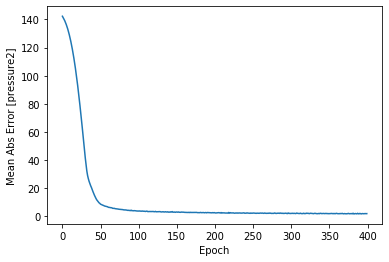

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 2.75
Accuracy: 97.6 %.


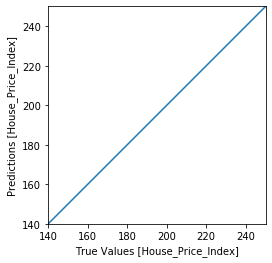

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.2
Accuracy: 98.51 %.


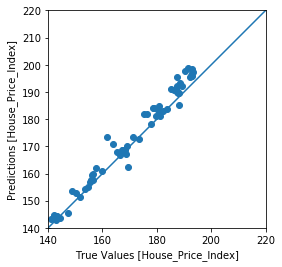

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,121.52173,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.900,43.2,2.3
1,122.39961,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.600,43.4,2.3
2,123.28627,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.600,43.4,2.3
3,124.49855,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.600,43.4,2.3
4,125.36724,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.600,43.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,192.66405,4.55,58725,7573.136,3.6,523861.973,764.9371,150174,5416,4.18,228.881,34.4,1.1
162,193.07051,4.63,58725,7573.136,3.4,523861.973,764.9371,150174,4336,4.02,228.881,34.4,1.1
163,192.92584,4.83,58725,7573.136,3.3,523861.973,764.9371,151486,4505,4.09,228.881,34.0,1.1
164,193.23869,4.87,58725,7573.136,3.2,523861.973,764.9371,151486,4920,4.05,228.881,34.0,1.1


In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,0
0,3/1/2005,121.52173,5.93,37170,5816.407,5.3,284456.508,1254.0813,43.20%,133706,2.30%,4281,4.19,188.900,127.870361
1,4/1/2005,122.39961,5.86,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,5548,4.69,196.600,125.607002
2,5/1/2005,123.28627,5.72,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,4878,4.58,196.600,123.205849
3,6/1/2005,124.49855,5.58,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134186,2.30%,5304,4.83,196.600,121.549232
4,7/1/2005,125.36724,5.70,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134032,2.30%,5140,5.06,196.600,123.159035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,8/1/2018,192.66405,4.55,58725,7573.136,3.6,523861.973,764.9371,34.40%,150174,1.10%,5416,4.18,228.881,195.916245
162,9/1/2018,193.07051,4.63,58725,7573.136,3.4,523861.973,764.9371,34.40%,150174,1.10%,4336,4.02,228.881,195.960587
163,10/1/2018,192.92584,4.83,58725,7573.136,3.3,523861.973,764.9371,34.00%,151486,1.10%,4505,4.09,228.881,197.010300
164,11/1/2018,193.23869,4.87,58725,7573.136,3.2,523861.973,764.9371,34.00%,151486,1.10%,4920,4.05,228.881,197.305756


In [19]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)

In [ ]:
#NY result test
NY_raw_dataset = pd.read_csv('NY summarized table from 2015.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

NY_features = NY_raw_dataset.copy()
NY_features=NY_features.drop('Date',axis=1)

NY_features.tail(40)

In [ ]:
mort_debt = np.array(NY_features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
NY_features = NY_features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(NY_features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
NY_features =NY_features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

NY_features['Percent_With_Mortgage_Debt'] = mdebt
NY_features['Percent_With_Severely_Delinquent_Debt'] = ddebt
NY_features.head()

In [ ]:
NY_labels = NY_features.pop('House_Price_Index(S&P/Case-Shiller)')

In [ ]:
NY_labels

In [ ]:
NY_features

In [ ]:
normed_NY_features=norm(NY_features)

In [ ]:
NY_predictions = model.predict(normed_NY_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(NY_labels, NY_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(NY_predictions - NY_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')